# Question 1
 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import spacy

In [4]:
tweets=pd.read_csv("C:\\Users\\avina\\Documents\\Data Science\\Assignments\\011. Text Mining\\Elon_musk.csv",encoding="latin-1")
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

## Text Preprocessing

In [5]:
tweets=[Text.strip() for Text in tweets.Text] # remove both the leading and the trailing spaces
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
# Joining the list into one string/text
tweets_j=' '.join(tweets)
tweets_j

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [7]:
# Removing mentions
import re
def remove_mentions(x):
    return re.sub(r"@\w+","",x)
x=tweets_j
tweets_nm=remove_mentions(x)
tweets_nm

' I\x92m an alien  Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?   Great interview!  Doge is underestimated  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM    Haha thanks :)   Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with  https://t.co/3rWE9uHSTS   It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account  <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O  Any crypto wallet that won\x92t give you your private keys should be avoided at all costs  Your app sucks RT : NASA has selected Falcon Heavy t

In [8]:
# Removing URLs
def remove_urls(y):
    return re.sub(r"https?://\S+","",y)
y=tweets_nm
tweets_nu=remove_urls(y)
tweets_nu

' I\x92m an alien  Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?   Great interview!  Doge is underestimated  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.     Haha thanks :)   Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account  <U+0001F923><U+0001F923> This is true power haha   Any crypto wallet that won\x92t give you your private keys should be avoided at all costs  Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission!   Yes    Once 

In [9]:
# Removing Hash tags
def remove_hashtags(z):
    return re.sub(r"#\w+","",z)
z=tweets_nu
tweets_clean=remove_hashtags(z)
tweets_clean

' I\x92m an alien  Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?   Great interview!  Doge is underestimated  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.     Haha thanks :)   Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account  <U+0001F923><U+0001F923> This is true power haha   Any crypto wallet that won\x92t give you your private keys should be avoided at all costs  Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission!   Yes    Once 

In [10]:
# removing unicode 
from unidecode import unidecode

def remove_unicode(a):
    return unidecode(a)
a=tweets_clean
tweets_clean1=remove_unicode(a)
tweets_clean1

' Im an alien  Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?   Great interview!  Doge is underestimated  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.     Haha thanks :)   Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account  <U+0001F923><U+0001F923> This is true power haha   Any crypto wallet that wont give you your private keys should be avoided at all costs  Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission!   Yes    Once we can predi

In [11]:
#Punctuation
tweet_nop=tweets_clean1.translate(str.maketrans('','', string.punctuation))
tweet_nop

' Im an alien  Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it   Great interview  Doge is underestimated  Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all     Haha thanks    Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     Its getting real Bought some Dogecoin for lil X so he can be a toddler hodler  He definitely has issues but the sentencing seems a bit high  Thanks for fixing  Please unlock my account  U0001F923U0001F923 This is true power haha   Any crypto wallet that wont give you your private keys should be avoided at all costs  Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes    Once we can predict cash flow reasonably we

In [12]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tweets_tokens=word_tokenize(tweet_nop)
tweets_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Im',
 'an',
 'alien',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'Doge',
 'is',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'Its',
 'getting',
 'real',
 'Bought',
 'some',
 'Dogecoin',
 'for',
 'lil',
 'X',
 'so',
 'he',
 'can',
 'be',
 'a',
 'toddler',
 'hodler',
 'He',
 'definitely',
 'has',
 'issues',
 'but

In [13]:
len(tweets_tokens)

17134

In [14]:
#Normalize the data
tweets_lower=[x.lower() for x in tweets_tokens]
print(tweets_lower[0:25])

['im', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing']


In [15]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words=stopwords.words('english')
no_stop_tokens=[word for word in tweets_tokens if not word in stop_words]
print(no_stop_tokens[0:40])

['Im', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent']


In [17]:
#Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in tweets_lower]
print(stemmed_tokens[0:40])

['im', 'an', 'alien', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tri', 'it', 'great', 'interview', 'doge', 'is', 'underestim', 'congratul', 'tesla', 'china', 'for', 'amaz', 'execut', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happi', 'new', 'year', 'of']


In [18]:
pip install spacy en_core_web_sm

In [19]:
!python -m spacy download en

     ---------------------------------------- 12.8/12.8 MB 2.7 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [20]:
nlp=spacy.load("en_core_web_sm") 

In [21]:
# lemmas being one of them, but mostly POS, which will follow later
doc=nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Im alien Ray tracing Cyberpunk HDR nextlevel Have tried Great interview Doge underestimated Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox Frodo underdoge All thought would fail Himself Haha thanks Indeed Tweets definitely


In [22]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:25])

['I', 'm', 'alien', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'great', 'interview', 'Doge', 'underestimate', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy']


## Feature extraction

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(lemmas)

In [24]:
print(vectorizer.vocabulary_)

{'alien': 203, 'ray': 2412, 'trace': 3096, 'cyberpunk': 787, 'hdr': 1389, 'nextlevel': 2013, 'have': 1385, 'try': 3129, 'great': 1336, 'interview': 1594, 'doge': 914, 'underestimate': 3253, 'congratulations': 693, 'tesla': 3000, 'china': 599, 'amazing': 227, 'execution': 1084, 'last': 1680, 'year': 3475, 'now': 2041, 'next': 2012, 'even': 1059, 'happy': 1373, 'new': 2010, 'ox': 2140, 'frodo': 1236, 'underdoge': 3252, 'all': 206, 'thought': 3037, 'would': 3460, 'fail': 1119, 'himself': 1433, 'haha': 1362, 'thank': 3011, 'indeed': 1533, 'tweets': 3148, 'definitely': 826, 'represent': 2480, 'realworld': 2427, 'time': 3054, 'allocation': 208, 'the': 3016, 'entertaining': 1030, 'outcome': 2119, 'likely': 1736, 'just': 1637, 'send': 2626, 'agree': 185, 'clubhouse': 629, 'its': 1615, 'get': 1296, 'real': 2422, 'bought': 471, 'dogecoin': 916, 'lil': 1737, 'toddler': 3067, 'hodler': 1439, 'he': 1390, 'issue': 1612, 'sentencing': 2631, 'seem': 2618, 'bit': 432, 'high': 1423, 'fix': 1182, 'please

In [25]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['25', '250', '250kw', '25d', '25gunscom', '25k', '25th', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '4680', '479000', '48', '4d', '4th', '50', '50000', '50k', '60', '60000', '65', '69420']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\avina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
print(X.toarray().shape)

(11948, 3493)


### bigrams and trigrams

In [27]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(tweets)

In [28]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


## Generate word cloud

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [30]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

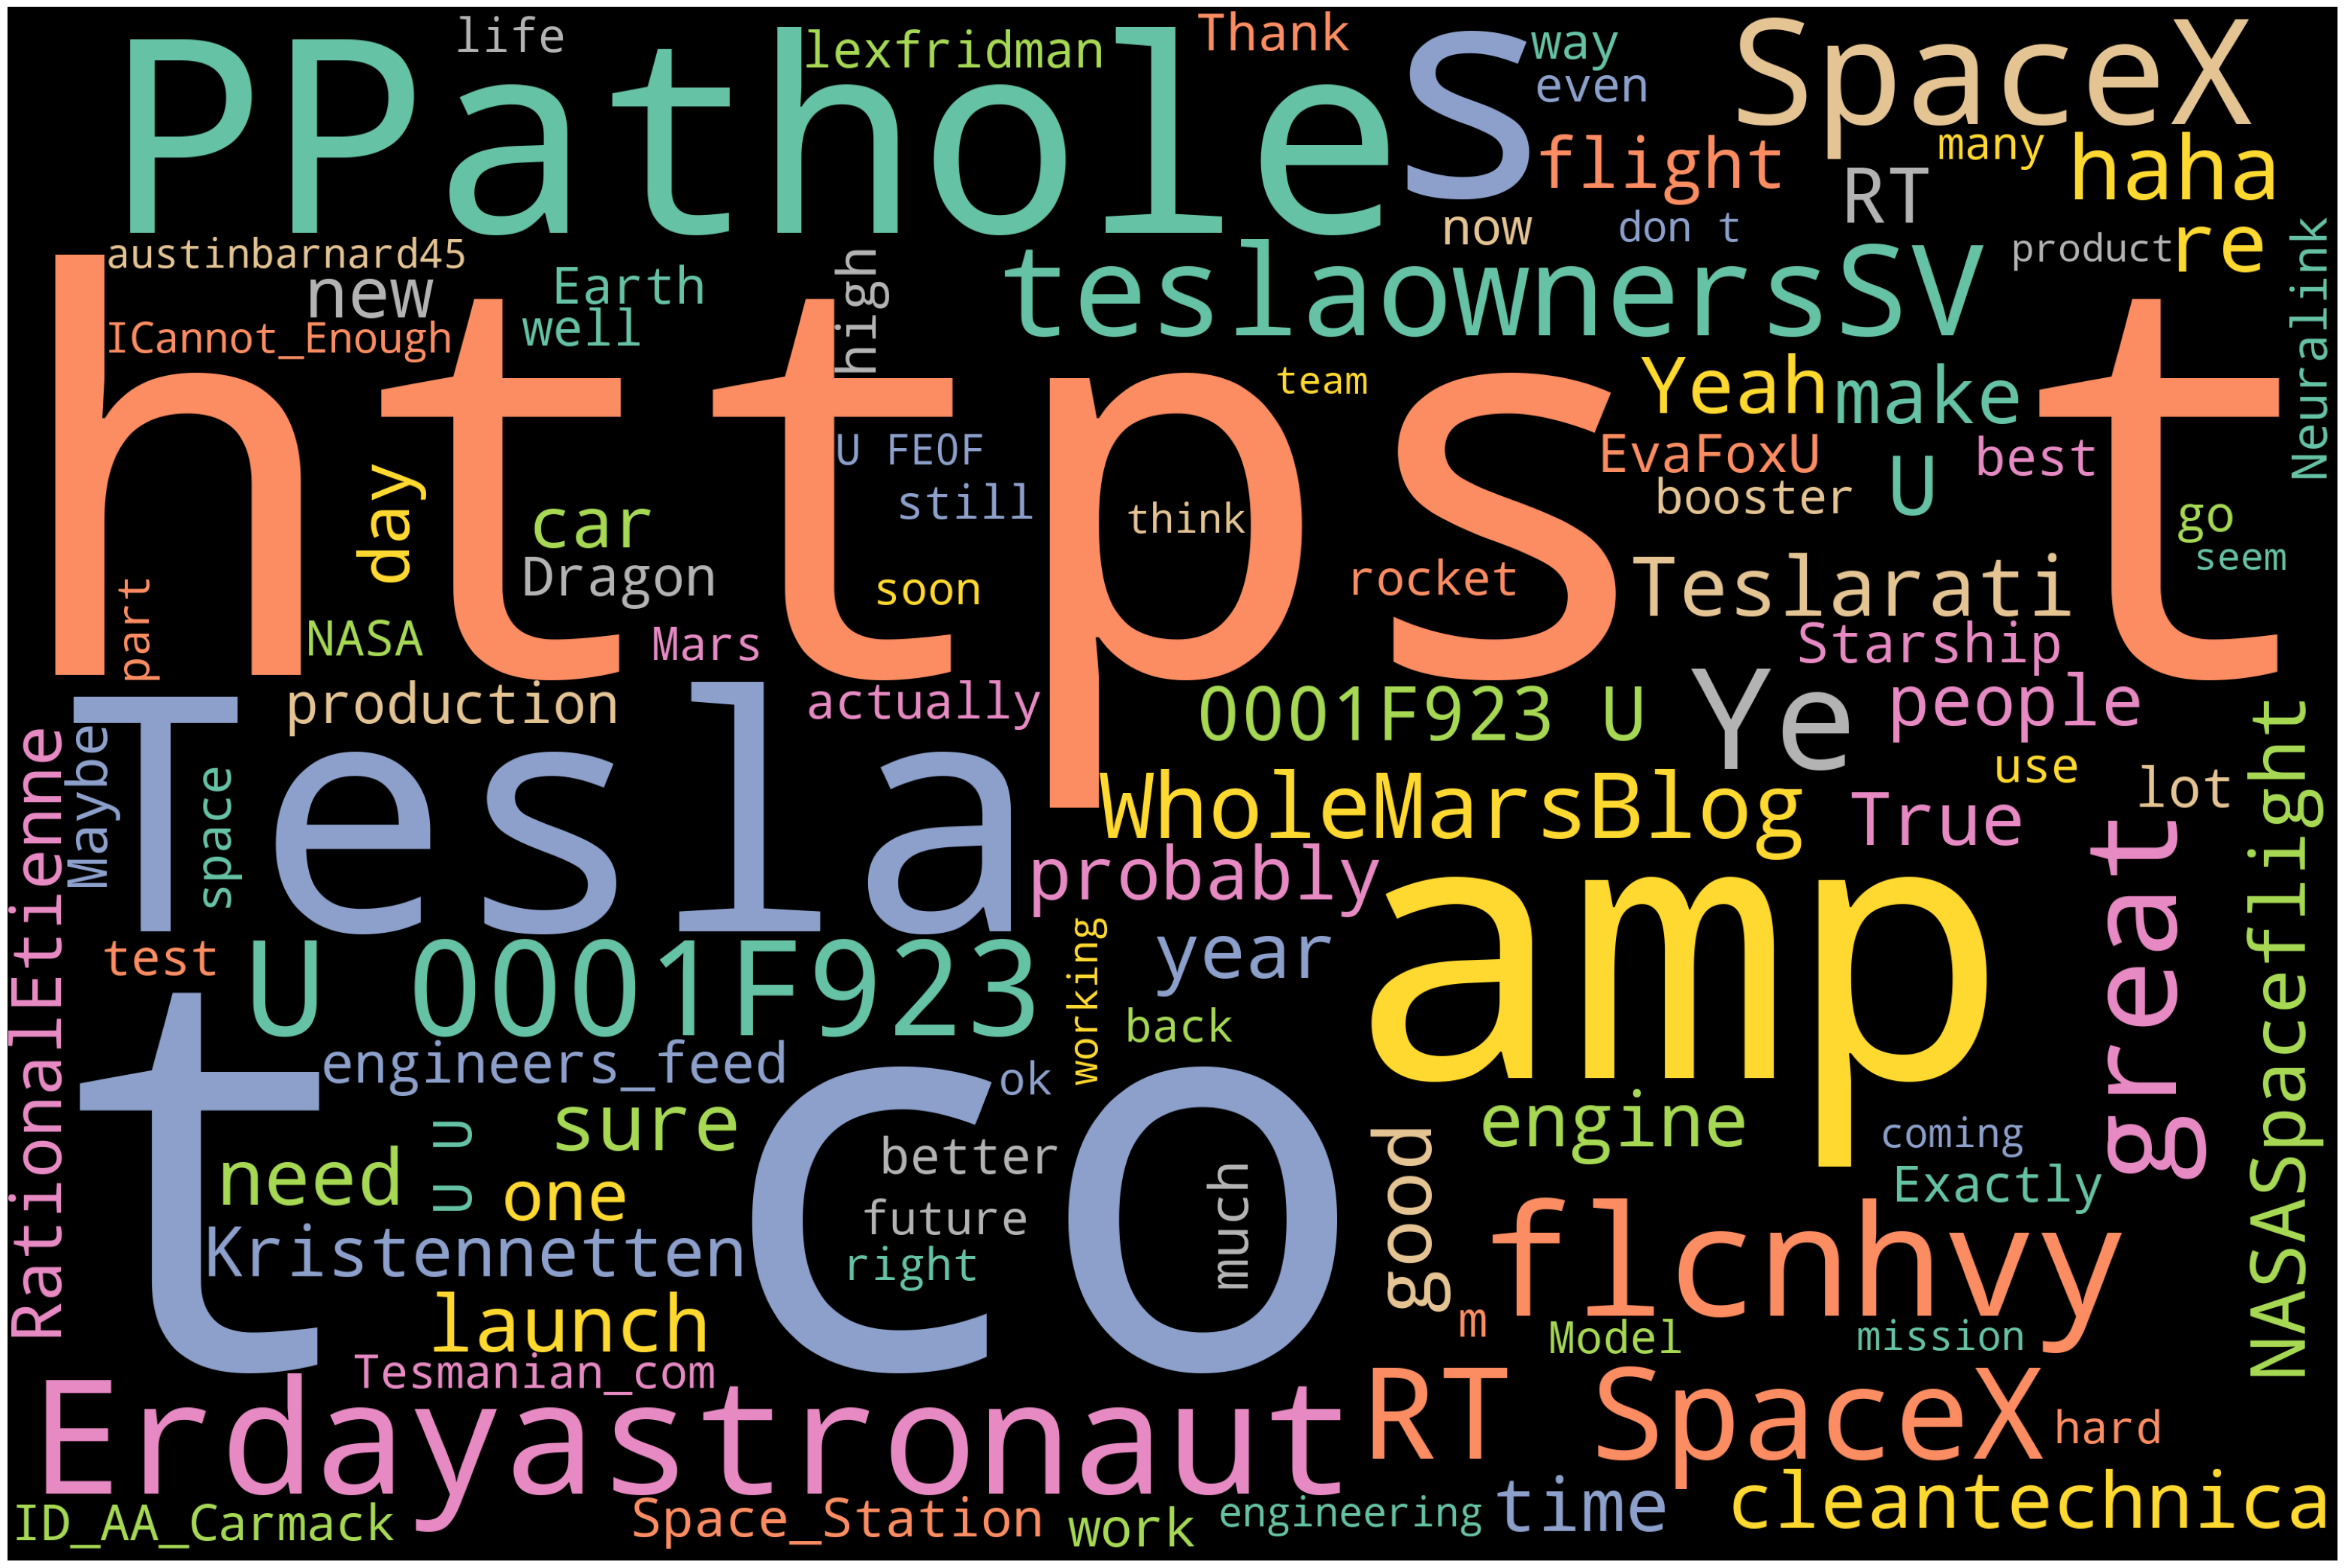

In [31]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', 
                      max_words=100,colormap='Set2',stopwords=stopwords).generate(tweets_j)
# Plot
plot_cloud(wordcloud)

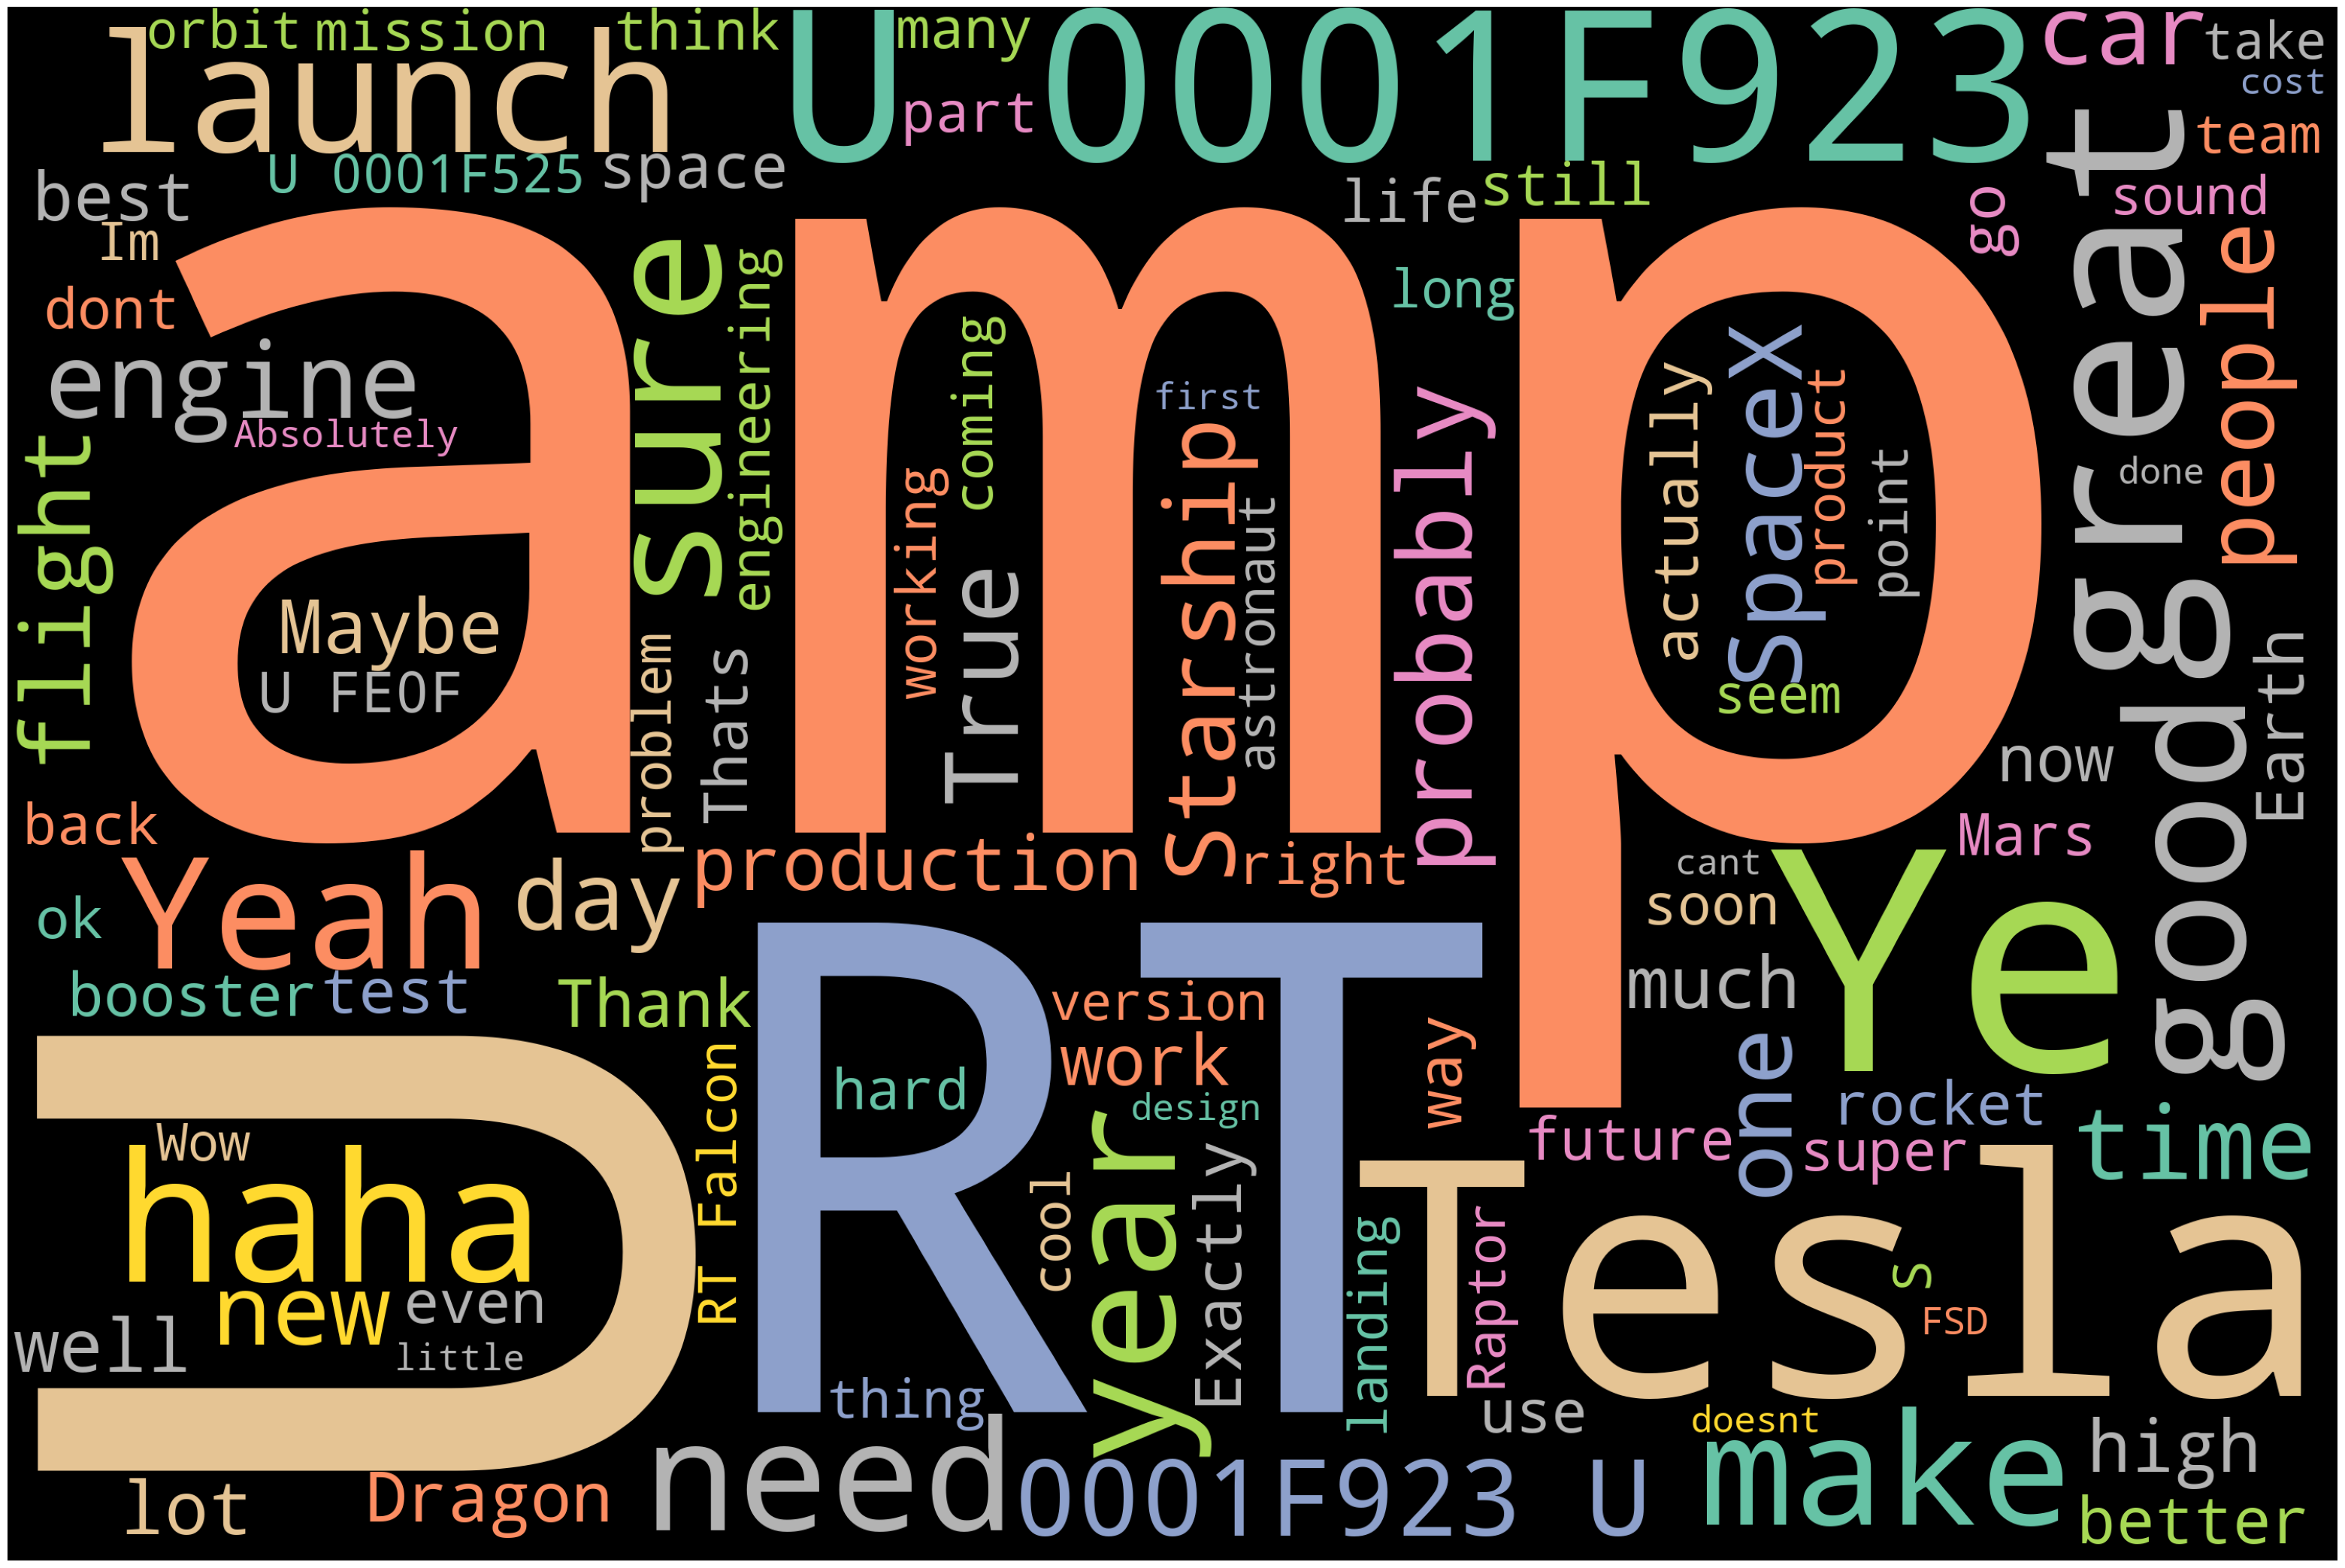

In [32]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', 
                      max_words=100,colormap='Set2',stopwords=stopwords).generate(tweets_clean1)
# Plot
plot_cloud(wordcloud)

### sentiment analysis

In [33]:
import spacy

In [34]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block = tweets_clean1
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [35]:
for token in doc_block:
    print(token, token.pos_)

  SPACE
I PRON
m VERB
an DET
alien ADJ
  SPACE
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT
   SPACE
Great ADJ
interview NOUN
! PUNCT
  SPACE
Doge PROPN
is AUX
underestimated VERB
  SPACE
Congratulations PROPN
Tesla PROPN
China PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
Now ADV
on ADV
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT
Happy ADJ
New PROPN
Year PROPN
of ADP
the DET
Ox PROPN
! PUNCT
  SPACE
Frodo PROPN
was AUX
the DET
underdoge ADJ
, PUNCT

 SPACE
All PRON
thought VERB
he PRON
would AUX
fail VERB
, PUNCT

 SPACE
Himself PRON
most ADJ
of ADP
all PRON
. PUNCT
     SPACE
Haha PROPN
thanks NOUN
:) X
   SPACE
Indeed ADV
! PUNCT
Tweets NOUN
definitely ADV
do AUX
not PART
represent VERB
real ADJ
- PUNCT
world NOUN
time NOUN
allocation NOUN
. PUNCT
The DET
most ADV
entertaining ADJ
outcome NOUN
is AUX
the DET
most ADV
likely ADJ
  SPA

In [36]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['m', 'tracing', 'level', 'tried', 'interview', 'underestimated', 'execution', 'year', 'thought', 'fail', 'thanks', 'Tweets', 'represent', 'world', 'time', 'allocation', 'outcome', 'sent', 'agree', 'do', 'Clubhouse', 'getting', 'Bought', 'toddler', 'hodler', 'has', 'issues', 'sentencing', 'seems', 'bit', 'Thanks', 'fixing', 'unlock', 'account', 'power', 'haha', 'crypto', 'wallet', 'give', 'keys', 'avoided', 'costs', 'app', 'sucks', 'selected', 'launch', 'elements', 'Gateway', 'mission', 'predict', 'cash', 'flow', 'Starlink', 'endeavor', 'don', 'needs', 'pass', 'chasm', 'cash', 'flow', 'year', 'cost', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'g', 'meant', 'price', 'countries', 'difference', 'taxes', 'amp', 'shipping', 'intended', 'ideas', 'apply', 'XPrize', 'team', 'manage', 'carbon', 'capture', 'prize', 'receives', 'stock', 'comp', 'stock', 'options', 'take', 'table', 's', 'missing', 'work', 'go', 'seem', 'bit', 'appears', 'fixed', '#', 'coins', 'unit', 'time'

In [37]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

word  count
0           have     46
1         launch     42
2            amp     33
3           make     33
4         people     31
...          ...    ...
2336  propaganda      1
2337       terms      1
2338  conditions      1
2339    clicking      1
2340      accept      1

[2341 rows x 2 columns]

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

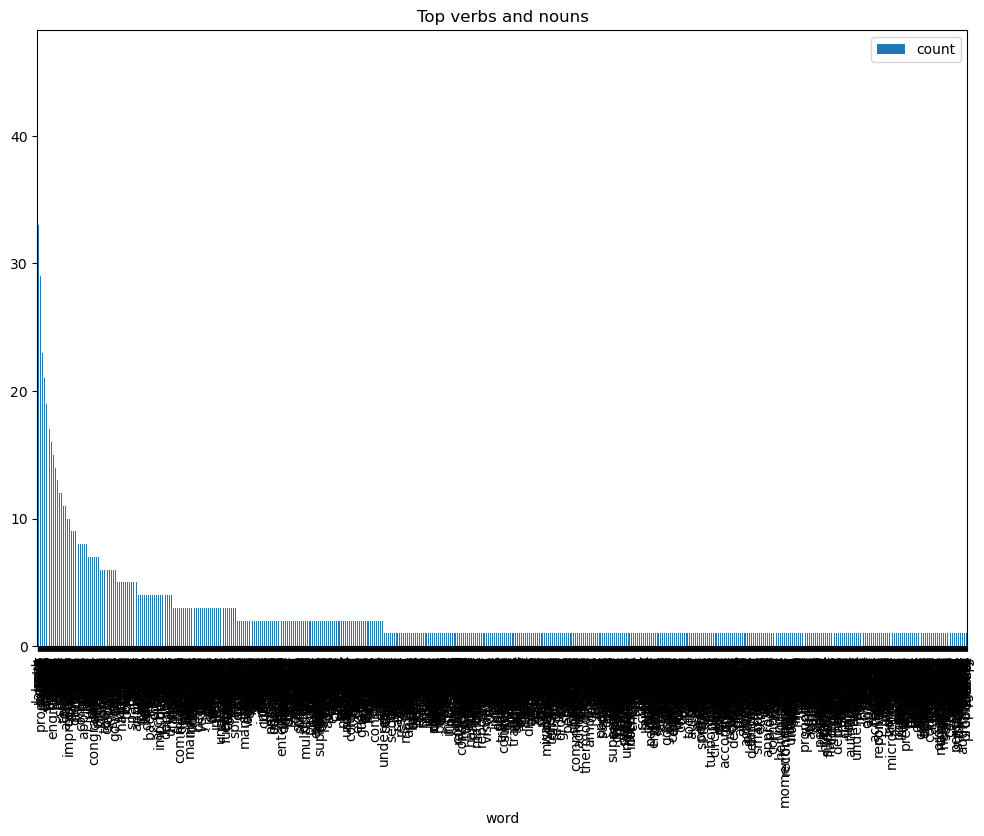

In [38]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df.plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [39]:
pip install afinn

Note: you may need to restart the kernel to use updated packages.


In [40]:
afinn=pd.read_csv("C:\\Users\\avina\\Documents\\Data Science\\Afinn.csv",encoding="latin1")

In [41]:
afinn.head()

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [42]:
from nltk import tokenize
sentences = tokenize.sent_tokenize("".join(tweets_clean1))
sentences

[' Im an alien  Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 'Great interview!',
 'Doge is underestimated  Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'Haha thanks :)   Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account  <U+0001F923><U+0001F923> This is true power haha   Any crypto wallet that wont give you your private keys should be avoided at all costs  Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one missio

In [43]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0     Im an alien  Ray tracing on Cyberpunk with HD...
1                                   Have you tried it?
2                                     Great interview!
3    Doge is underestimated  Congratulations Tesla ...
4                   Now on to the next for even more!!
..                                                 ...
920  Not actually a payout, just a vesting of stock...
921  It may never pay out, as the stock cant b   No...
922                                    Details Aug 28.
923  AI symbiosis while u wait   Theres some of tha...
924  Samwise Gamgee  Altho Dumb and Dumber is <U+00...

[925 rows x 1 columns]

In [44]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [45]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [46]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [47]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [48]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    11
1     4
2     2
3    11
4     8
5     6
6    13
7     4
8     8
9    97
Name: word_count, dtype: int64

In [49]:
sent_df.sort_values(by='sentiment_value').head(10)

sentence  sentiment_value  \
648  Very ba   Its too embarrassing Just learned th...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
838  Cool Model 3 review by    Tesla will add a pow...               -7   
482  He plays the poor inventor card, but was rich ...               -5   
921  It may never pay out, as the stock cant b   No...               -4   
887  This is primarily an electrical/electronic (ch...               -4   
681  Occasional flights from land are ok, but frequ...               -4   
612  Then static fire, checkouts, static fire, fly ...               -4   
23   The people have spoken     So cute <U+0001F495...               -3   
218  RT : Tunnel Rave   And no toilet paper <U+0001...               -3   

     word_count  
648          52  
64           11  
838          54  
482          32  
921          29  
887          63  
681          34  
612          12  
23           32  
218         112

In [50]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    925.000000
mean       1.443243
std        2.734316
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [51]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

sentence  sentiment_value  \
0   Im an alien  Ray tracing on Cyberpunk with HD...                0   
1                                 Have you tried it?                0   
4                 Now on to the next for even more!!                0   
5                          Happy New Year of the Ox!                0   
6  Frodo was the underdoge,\nAll thought he would...               -2   

   word_count  
0          11  
1           4  
4           8  
5           6  
6          13

In [52]:
sent_df['index']=range(0,len(sent_df))

C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

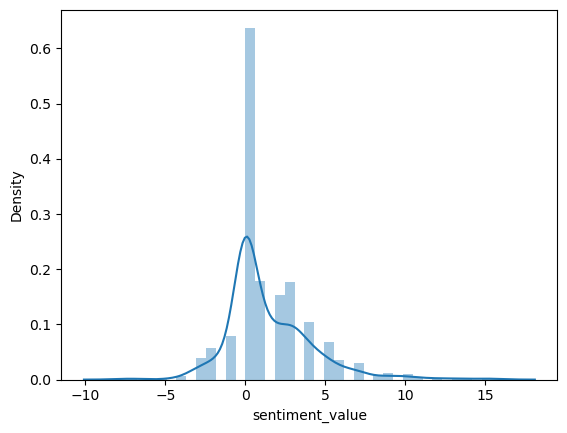

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

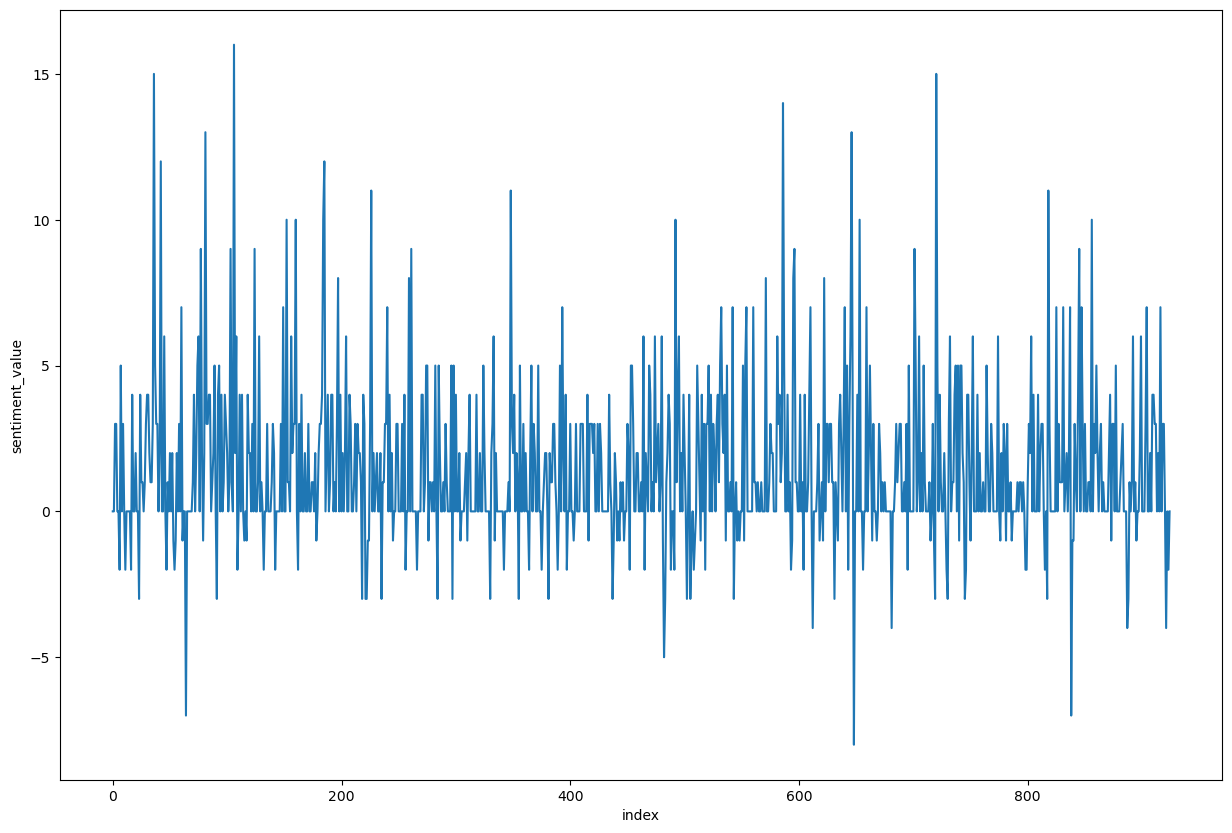

In [54]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

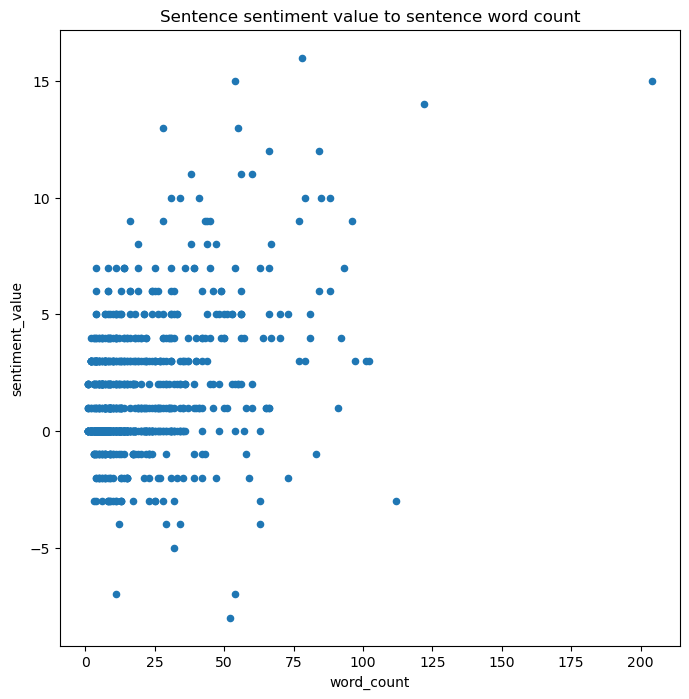

In [55]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# Question 2

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining


In [56]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [57]:
url="https://www.amazon.in/Armorol-Ultra-100ml-Enfield-Bullet/product-reviews/B09TTKRF9P/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [58]:
page=requests.get(url)
page

<Response [200]>

In [59]:
soup=BeautifulSoup(page.content,'html.parser')
soup1=BeautifulSoup(soup.prettify())
soup1

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<!-- sp:end-feature:csm:head-open-part2 -->
<!-- sp:feature:aui-assets -->
<link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41C-I1lXVwL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11Qjwq-j69L.css,01Dm5eKV

In [60]:
review=soup1.find_all("span",{"data-hook":"review-body"})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span class="cr-original-review-content">
                   സ്കൂട്ടർ ഓടിക്കാൻ വളരെ സ്മൂത്തായി
                  </span>
 <span class="cr-translated-review-content aok-hidden">
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
                   Good
                  </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
                   I like its packing. I used in my santro 1.0 /2011 model car. It's effective. My car running very smoothly.
                  </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
                   I have a 2013 Duster 110 PS, Clocked 1,40,000 kms. It has some Pick-up issues on city Drives.
                   <br/>
                   I used this 100 ml and the results are amazing.
                

In [61]:
review_content=[]
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

['\n\n                  സ്കൂട്ടർ ഓടിക്കാൻ വളരെ സ്മൂത്തായി\n                 \n\n\n',
 '\n\n                  Good\n                 \n',
 "\n\n                  I like its packing. I used in my santro 1.0 /2011 model car. It's effective. My car running very smoothly.\n                 \n",
 '\n\n                  I have a 2013 Duster 110 PS, Clocked 1,40,000 kms. It has some Pick-up issues on city Drives.\n                  \n                  I used this 100 ml and the results are amazing.\n                  \n                  It just solved many problems like Loss of pickup\n                  \n                  it Increased Mileage of 1 kms. (14 to 15.1)\n                  \n                  Over all the Car is smooth like it’s floating on the water.\n                  \n                  My gear changing Ratio also reduced. In city drives when the traffic is dead slow I need to change gears. Other wise it goes well in 3rd gear\n                  \n                  I would recomm

In [96]:
# Remove the first line from the list
review_content=review_content[1:]

print(review_content)

['                  Good\n                 ', "                  I like its packing. I used in my santro 1.0 /2011 model car. It's effective. My car running very smoothly.\n                 ", '                  I have a 2013 Duster 110 PS, Clocked 1,40,000 kms. It has some Pick-up issues on city Drives.\n                  \n                  I used this 100 ml and the results are amazing.\n                  \n                  It just solved many problems like Loss of pickup\n                  \n                  it Increased Mileage of 1 kms. (14 to 15.1)\n                  \n                  Over all the Car is smooth like it’s floating on the water.\n                  \n                  My gear changing Ratio also reduced. In city drives when the traffic is dead slow I need to change gears. Other wise it goes well in 3rd gear\n                  \n                  I would recommend this product highly\n                  \n\n                  I have used this Motol Synthetic Oil.\

In [97]:
review_content[:]=[reviews.lstrip('\n') for reviews in review_content]
review_content

['                  Good\n                 ',
 "                  I like its packing. I used in my santro 1.0 /2011 model car. It's effective. My car running very smoothly.\n                 ",
 '                  I have a 2013 Duster 110 PS, Clocked 1,40,000 kms. It has some Pick-up issues on city Drives.\n                  \n                  I used this 100 ml and the results are amazing.\n                  \n                  It just solved many problems like Loss of pickup\n                  \n                  it Increased Mileage of 1 kms. (14 to 15.1)\n                  \n                  Over all the Car is smooth like it’s floating on the water.\n                  \n                  My gear changing Ratio also reduced. In city drives when the traffic is dead slow I need to change gears. Other wise it goes well in 3rd gear\n                  \n                  I would recommend this product highly\n                  \n\n                  I have used this Motol Synthetic Oil

In [98]:
review_content[:]=[reviews.rstrip('\n') for reviews in review_content]
review_content

['                  Good\n                 ',
 "                  I like its packing. I used in my santro 1.0 /2011 model car. It's effective. My car running very smoothly.\n                 ",
 '                  I have a 2013 Duster 110 PS, Clocked 1,40,000 kms. It has some Pick-up issues on city Drives.\n                  \n                  I used this 100 ml and the results are amazing.\n                  \n                  It just solved many problems like Loss of pickup\n                  \n                  it Increased Mileage of 1 kms. (14 to 15.1)\n                  \n                  Over all the Car is smooth like it’s floating on the water.\n                  \n                  My gear changing Ratio also reduced. In city drives when the traffic is dead slow I need to change gears. Other wise it goes well in 3rd gear\n                  \n                  I would recommend this product highly\n                  \n\n                  I have used this Motol Synthetic Oil

In [99]:
df=pd.DataFrame({'review':review_content})
df

review
0                            Good\n                 
1                    I like its packing. I used i...
2                    I have a 2013 Duster 110 PS,...
3                    I have used this in my domin...
4                    Figo tdci 2010\n            ...
5                    It's ok, but no more improve...
6                    I have been using this coole...
7                    My bolero is now running muc...
8                    I had long drive in my Innov...

In [100]:
join=''.join(review_content)
join

"                  Good\n                                   I like its packing. I used in my santro 1.0 /2011 model car. It's effective. My car running very smoothly.\n                                   I have a 2013 Duster 110 PS, Clocked 1,40,000 kms. It has some Pick-up issues on city Drives.\n                  \n                  I used this 100 ml and the results are amazing.\n                  \n                  It just solved many problems like Loss of pickup\n                  \n                  it Increased Mileage of 1 kms. (14 to 15.1)\n                  \n                  Over all the Car is smooth like it’s floating on the water.\n                  \n                  My gear changing Ratio also reduced. In city drives when the traffic is dead slow I need to change gears. Other wise it goes well in 3rd gear\n                  \n                  I would recommend this product highly\n                  \n\n                  I have used this Motol Synthetic Oil.\n        

In [101]:
#Punctuation
rev_nop=join.translate(str.maketrans('','', string.punctuation))
rev_nop

'                  Good\n                                   I like its packing I used in my santro 10 2011 model car Its effective My car running very smoothly\n                                   I have a 2013 Duster 110 PS Clocked 140000 kms It has some Pickup issues on city Drives\n                  \n                  I used this 100 ml and the results are amazing\n                  \n                  It just solved many problems like Loss of pickup\n                  \n                  it Increased Mileage of 1 kms 14 to 151\n                  \n                  Over all the Car is smooth like it’s floating on the water\n                  \n                  My gear changing Ratio also reduced In city drives when the traffic is dead slow I need to change gears Other wise it goes well in 3rd gear\n                  \n                  I would recommend this product highly\n                  \n\n                  I have used this Motol Synthetic Oil\n                              

In [102]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
rev_tokens=word_tokenize(rev_nop)
rev_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Good',
 'I',
 'like',
 'its',
 'packing',
 'I',
 'used',
 'in',
 'my',
 'santro',
 '10',
 '2011',
 'model',
 'car',
 'Its',
 'effective',
 'My',
 'car',
 'running',
 'very',
 'smoothly',
 'I',
 'have',
 'a',
 '2013',
 'Duster',
 '110',
 'PS',
 'Clocked',
 '140000',
 'kms',
 'It',
 'has',
 'some',
 'Pickup',
 'issues',
 'on',
 'city',
 'Drives',
 'I',
 'used',
 'this',
 '100',
 'ml',
 'and',
 'the',
 'results',
 'are',
 'amazing',
 'It',
 'just',
 'solved',
 'many',
 'problems',
 'like',
 'Loss',
 'of',
 'pickup',
 'it',
 'Increased',
 'Mileage',
 'of',
 '1',
 'kms',
 '14',
 'to',
 '151',
 'Over',
 'all',
 'the',
 'Car',
 'is',
 'smooth',
 'like',
 'it',
 '’',
 's',
 'floating',
 'on',
 'the',
 'water',
 'My',
 'gear',
 'changing',
 'Ratio',
 'also',
 'reduced',
 'In',
 'city',
 'drives',
 'when',
 'the',
 'traffic',
 'is',
 'dead',
 'slow',
 'I',
 'need',
 'to',
 'change',
 'gears',
 'Other',
 'wise',
 'it',
 'goes',
 'well',
 'in',
 '3rd',
 'gear',
 'I',
 'would',
 'recommend',
 'th

In [103]:
#Normalize the data
rev_lower=[x.lower() for x in rev_tokens]
print(rev_lower[0:25])

['good', 'i', 'like', 'its', 'packing', 'i', 'used', 'in', 'my', 'santro', '10', '2011', 'model', 'car', 'its', 'effective', 'my', 'car', 'running', 'very', 'smoothly', 'i', 'have', 'a', '2013']


In [104]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
stop_words=stopwords.words('english')
no_stop_tokens_rev=[word for word in rev_tokens if not word in stop_words]
print(no_stop_tokens_rev[0:40])

['Good', 'I', 'like', 'packing', 'I', 'used', 'santro', '10', '2011', 'model', 'car', 'Its', 'effective', 'My', 'car', 'running', 'smoothly', 'I', '2013', 'Duster', '110', 'PS', 'Clocked', '140000', 'kms', 'It', 'Pickup', 'issues', 'city', 'Drives', 'I', 'used', '100', 'ml', 'results', 'amazing', 'It', 'solved', 'many', 'problems']


In [106]:
#Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_rev_tokens=[ps.stem(word) for word in rev_lower]
print(stemmed_rev_tokens[0:40])

['good', 'i', 'like', 'it', 'pack', 'i', 'use', 'in', 'my', 'santro', '10', '2011', 'model', 'car', 'it', 'effect', 'my', 'car', 'run', 'veri', 'smoothli', 'i', 'have', 'a', '2013', 'duster', '110', 'ps', 'clock', '140000', 'km', 'it', 'ha', 'some', 'pickup', 'issu', 'on', 'citi', 'drive', 'i']


In [107]:
nlp=spacy.load("en_core_web_sm")

In [108]:
# lemmas being one of them, but mostly POS, which will follow later
doc_rev=nlp(' '.join(no_stop_tokens_rev))
print(doc_rev[0:40])

Good I like packing I used santro 10 2011 model car Its effective My car running smoothly I 2013 Duster 110 PS Clocked 140000 kms It Pickup issues city Drives I used 100 ml results amazing It solved many problems


In [109]:
lemmas_rev=[token.lemma_ for token in doc_rev]
print(lemmas_rev[0:25])

['good', 'I', 'like', 'packing', 'I', 'use', 'santro', '10', '2011', 'model', 'car', 'its', 'effective', 'my', 'car', 'run', 'smoothly', 'I', '2013', 'Duster', '110', 'PS', 'Clocked', '140000', 'km']


### Feature extraction

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_rev=CountVectorizer()
x_rev=vectorizer.fit_transform(lemmas_rev)

In [111]:
print(vectorizer.vocabulary_)

{'good': 60, 'like': 85, 'packing': 114, 'use': 153, 'santro': 131, '10': 0, '2011': 12, 'model': 98, 'car': 33, 'its': 76, 'effective': 48, 'my': 102, 'run': 130, 'smoothly': 137, '2013': 13, 'duster': 47, '110': 2, 'ps': 123, 'clocked': 37, '140000': 5, 'km': 79, 'it': 74, 'pickup': 119, 'issue': 73, 'city': 35, 'drive': 46, '100': 1, 'ml': 97, 'result': 128, 'amazing': 21, 'solve': 139, 'many': 93, 'problem': 120, 'loss': 88, 'increase': 69, 'mileage': 96, 'kms': 81, '14': 4, '151': 6, 'over': 113, 'smooth': 135, 'float': 54, 'water': 157, 'gear': 55, 'change': 34, 'ratio': 124, 'also': 19, 'reduce': 126, 'in': 68, 'traffic': 151, 'dead': 43, 'slow': 134, 'need': 104, 'other': 111, 'wise': 159, 'go': 59, 'well': 158, '3rd': 16, 'would': 161, 'recommend': 125, 'product': 121, 'highly': 65, 'motol': 100, 'synthetic': 147, 'oil': 107, 'dominar': 45, 'seem': 133, 'bike': 25, 'smoother': 136, 'figo': 52, 'tdci': 148, '2010': 11, 'ok': 108, 'improvement': 67, 'coolent': 40, 'lube': 91, 'j

In [112]:
print(vectorizer.get_feature_names()[50:100])
print(x_rev.toarray()[50:100])

['engine', 'every', 'figo', 'find', 'float', 'gear', 'get', 'gimiky', 'give', 'go', 'good', 'happen', 'happy', 'heat', 'heating', 'highly', 'huge', 'improvement', 'in', 'increase', 'initial', 'initially', 'innova', 'issue', 'it', 'item', 'its', 'jawa', 'journey', 'km', 'kmpl', 'kms', 'know', 'launch', 'level', 'like', 'litter', 'long', 'loss', 'lot', 'low', 'lube', 'luck', 'many', 'marketing', 'milage', 'mileage', 'ml', 'model', 'month']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\avina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [113]:
print(x_rev.toarray().shape)

(265, 164)


### Generate word cloud

In [120]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

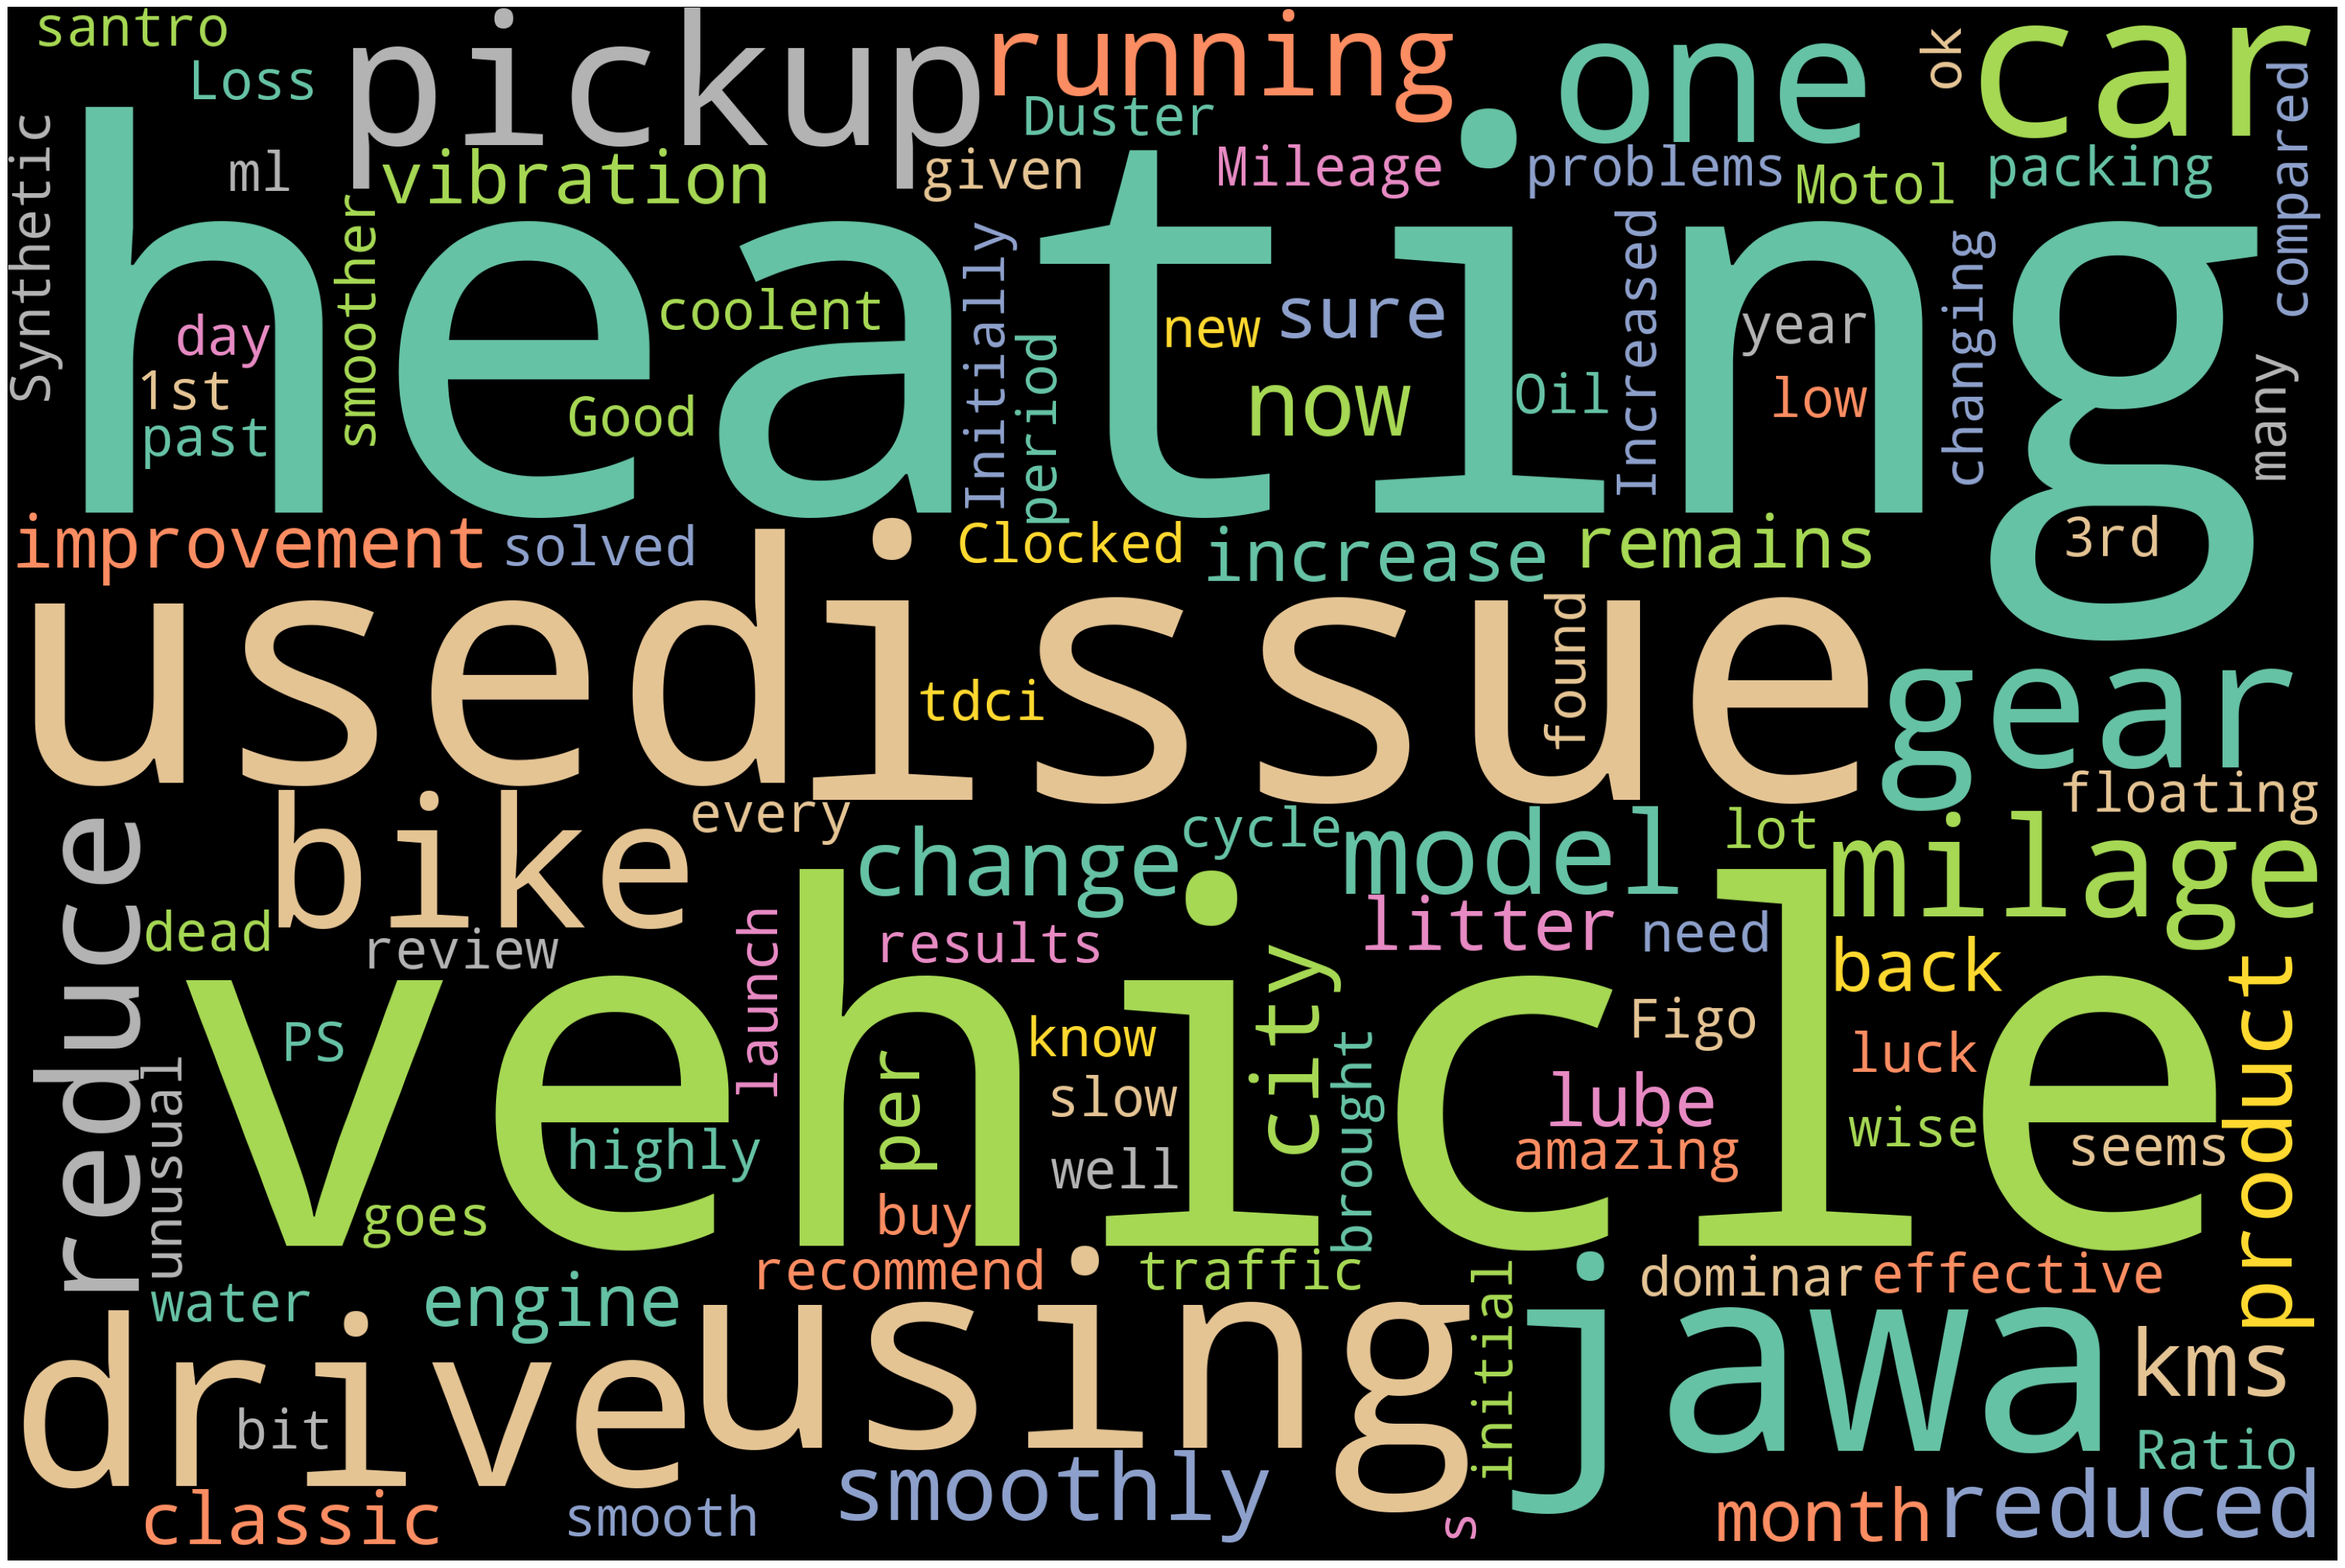

In [121]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', 
                      max_words=100,colormap='Set2',stopwords=stopwords).generate(rev_nop)
# Plot
plot_cloud(wordcloud)

### sentiment analysis

In [122]:
import spacy

In [125]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block_rev = rev_nop
doc_block_rev = nlp(one_block_rev)
spacy.displacy.render(doc_block_rev, style='ent', jupyter=True)

In [126]:
for token in doc_block_rev:
    print(token, token.pos_)

                   SPACE
Good PROPN

                                    SPACE
I PRON
like VERB
its PRON
packing NOUN
I PRON
used VERB
in ADP
my PRON
santro PROPN
10 NUM
2011 NUM
model NOUN
car NOUN
Its PRON
effective ADJ
My PRON
car NOUN
running VERB
very ADV
smoothly ADV

                                    SPACE
I PRON
have VERB
a DET
2013 NUM
Duster PROPN
110 NUM
PS PROPN
Clocked PROPN
140000 NUM
kms NOUN
It PRON
has VERB
some DET
Pickup PROPN
issues NOUN
on ADP
city NOUN
Drives NOUN

                  
                   SPACE
I PRON
used VERB
this DET
100 NUM
ml NOUN
and CCONJ
the DET
results NOUN
are AUX
amazing ADJ

                  
                   SPACE
It PRON
just ADV
solved VERB
many ADJ
problems NOUN
like ADP
Loss PROPN
of ADP
pickup NOUN

                  
                   SPACE
it PRON
Increased VERB
Mileage PROPN
of ADP
1 NUM
kms PROPN
14 NUM
to ADP
151 NUM

                  
                   SPACE
Over ADP
all DET
the DET
Car NOUN
is AUX
smooth ADJ
like SCON

In [127]:
#Filtering for nouns and verbs only
nouns_verbs_rev = [token.text for token in doc_block_rev if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs_rev)

['like', 'packing', 'used', 'model', 'car', 'car', 'running', 'have', 'kms', 'has', 'issues', 'city', 'Drives', 'used', 'ml', 'results', 'solved', 'problems', 'pickup', 'Increased', 'Car', 'floating', 'water', 'gear', 'changing', 'Ratio', 'reduced', 'city', 'drives', 'traffic', 'need', 'change', 'gears', 'goes', 'gear', 'recommend', 'product', 'used', 'used', 'dominar', 'seems', 'bike', 'tdci', 'improvement', 'using', 'lube', 'classic', 'given', 'review', 'using', 'month', 'one', 'know', 'heating', 'issues', 'have', 'day', 'had', 'heating', 'issues', 'luck', 'buy', 'lot', 'vehicle', 'brought', 'year', 'vehicle', 'launch', 'heating', 'bit', 'compared', 'bikes', 'using', 'lube', 'month', 'period', 'found', 'engine', 'heating', 'cycle', 'reduces', 'heating', 'vehicle', 'worked', 'reduces', 'heat', 'give', 'starts', 'saying', 'vehicle', 'pickup', 'milage', 'boosted', 'increase', 'say', 'happen', 'vehicle', 'remains', 'sound', 'engine', 'noise', 'vibration', 'level', 'changes', 'milage', 'r

In [129]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

x_rev = cv.fit_transform(nouns_verbs_rev)
sum_words_rev = x_rev.sum(axis=0)
words_freq_rev = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_rev =sorted(words_freq_rev, key = lambda x: x[1], reverse=True)
wf_df_rev = pd.DataFrame(words_freq_rev)
wf_df_rev.columns = ['word', 'count']

wf_df_rev

word  count
0     vehicle     33
1      diesel      9
2     product      7
3     packing      6
4         had      6
..        ...    ...
91     gimiky      1
92  marketing      1
93     bolero      1
94        got      1
95    journey      1

[96 rows x 2 columns]

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

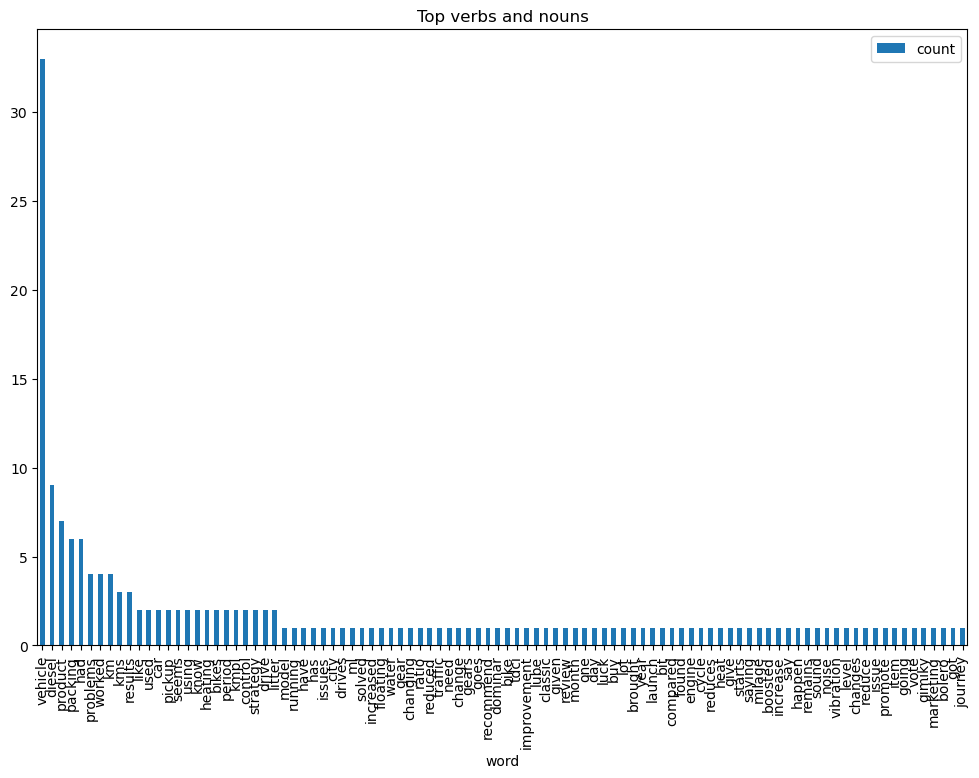

In [130]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df_rev.plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [131]:
afinn=pd.read_csv("C:\\Users\\avina\\Documents\\Data Science\\Afinn.csv",encoding="latin1")

In [132]:
afinn.head()

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [136]:
from nltk import tokenize
sentences_rev = tokenize.sent_tokenize("".join(review_content))
sentences_rev

['                  Good\n                                   I like its packing.',
 'I used in my santro 1.0 /2011 model car.',
 "It's effective.",
 'My car running very smoothly.',
 'I have a 2013 Duster 110 PS, Clocked 1,40,000 kms.',
 'It has some Pick-up issues on city Drives.',
 'I used this 100 ml and the results are amazing.',
 'It just solved many problems like Loss of pickup\n                  \n                  it Increased Mileage of 1 kms.',
 '(14 to 15.1)\n                  \n                  Over all the Car is smooth like it’s floating on the water.',
 'My gear changing Ratio also reduced.',
 'In city drives when the traffic is dead slow I need to change gears.',
 'Other wise it goes well in 3rd gear\n                  \n                  I would recommend this product highly\n                  \n\n                  I have used this Motol Synthetic Oil.',
 "I have used this in my dominar and seems the bike now smoother\n                                   Figo tdci 2010

In [137]:
sent_df_rev = pd.DataFrame(sentences_rev,columns=['sentence'])
sent_df_rev

sentence
0                     Good\n                      ...
1            I used in my santro 1.0 /2011 model car.
2                                     It's effective.
3                       My car running very smoothly.
4   I have a 2013 Duster 110 PS, Clocked 1,40,000 ...
5          It has some Pick-up issues on city Drives.
6     I used this 100 ml and the results are amazing.
7   It just solved many problems like Loss of pick...
8   (14 to 15.1)\n                  \n            ...
9                My gear changing Ratio also reduced.
10  In city drives when the traffic is dead slow I...
11  Other wise it goes well in 3rd gear\n         ...
12  I have used this in my dominar and seems the b...
13   Am given this review after using it for a month.
14  Initially every one know about new jawa bike h...
15  I have jawa classic from day one I had heating...
16  By luck am not buy 1st lot of the vehicle I ha...
17  After using this lube for past one month perio...
18                                                 1.
19  Yes it reduces heating on vehicle for me it wo...
20     And reduces the heat I give 5 starts for that.
21                                                 2.
22  But they saying vehicle pickup and milage will...
23  Actually my vehicle still remains same sound i...
24  3.for me am happy with the product only to red...
25  They will promote this item for something else...
26  But your vehicle heating issue will be reduced...
27  I had long drive in my Innova 2008 model diese...
28  I got 16km per litter during onward journey an...
29  This is a huge improvement over otherwise 12.5...

In [138]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [141]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [142]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [144]:
sent_df_rev['sentiment_value'] = sent_df_rev['sentence'].apply(calculate_sentiment)

In [145]:
# how many words are in the sentence?
sent_df_rev['word_count'] = sent_df_rev['sentence'].str.split().apply(len)
sent_df_rev['word_count'].head(10)

0     5
1     9
2     2
3     5
4    10
5     8
6    10
7    15
8    15
9     6
Name: word_count, dtype: int64

In [146]:
sent_df_rev.sort_values(by='sentiment_value').head(10)

sentence  sentiment_value  \
10  In city drives when the traffic is dead slow I...               -3   
14  Initially every one know about new jawa bike h...                0   
15  I have jawa classic from day one I had heating...                0   
28  I got 16km per litter during onward journey an...                0   
13   Am given this review after using it for a month.                0   
20     And reduces the heat I give 5 starts for that.                0   
17  After using this lube for past one month perio...                0   
21                                                 2.                0   
9                My gear changing Ratio also reduced.                0   
26  But your vehicle heating issue will be reduced...                0   

    word_count  
10          14  
14          12  
15          11  
28          14  
13          10  
20          10  
17          19  
21           1  
9            6  
26          21

In [147]:
# Sentiment score of the whole review
sent_df_rev['sentiment_value'].describe()

count    30.000000
mean      0.966667
std       1.564329
min      -3.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       4.000000
Name: sentiment_value, dtype: float64

In [148]:
# Sentiment score of the whole review
sent_df_rev[sent_df_rev['sentiment_value']<=0].head()

sentence  sentiment_value  \
1           I used in my santro 1.0 /2011 model car.                0   
3                      My car running very smoothly.                0   
4  I have a 2013 Duster 110 PS, Clocked 1,40,000 ...                0   
5         It has some Pick-up issues on city Drives.                0   
9               My gear changing Ratio also reduced.                0   

   word_count  
1           9  
3           5  
4          10  
5           8  
9           6

In [149]:
sent_df['index']=range(0,len(sent_df))

C:\Users\avina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

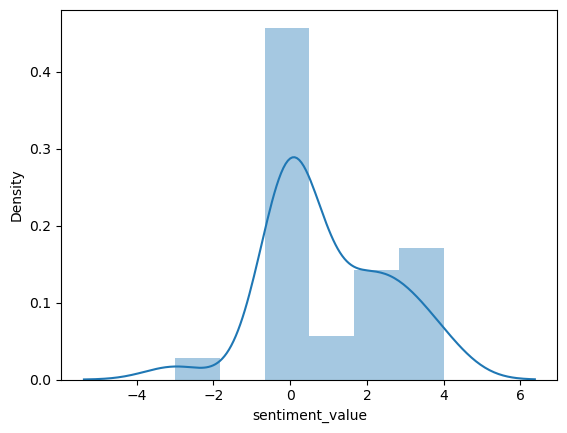

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df_rev['sentiment_value'])

In [151]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df_rev)

ValueError: Could not interpret value `index` for parameter `x`

<Figure size 1500x1000 with 0 Axes>

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

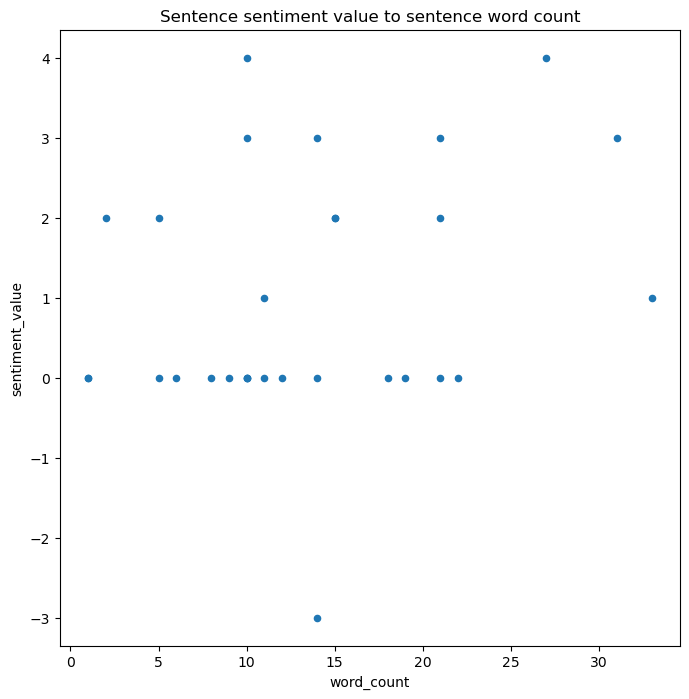

In [152]:
sent_df_rev.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')